# Sequences with only AMPA

In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=3.0)

from network import Protocol, BCPNNModular, NetworkManager
from plotting_functions import plot_weight_matrix, plot_state_variables_vs_time, plot_winning_pattern
from plotting_functions import plot_network_activity
from analysis_functions import calculate_recall_time_quantities

## Sequences with only AMPA
#### Training

In [2]:
# Patterns parameters
hypercolumns = 1
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'p_pre', 'beta',
                  'p_post', 'p_co', 'z_co', 'w', 'i_ampa', 'i_nmda']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
diagonal_zero = False
nn = BCPNNModular(hypercolumns, minicolumns, tau_z_pre_ampa=tau_z_pre_ampa, 
                  tau_z_post_ampa=tau_z_post_ampa, diagonal_zero=diagonal_zero)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

epochs 0
epochs 1
epochs 2


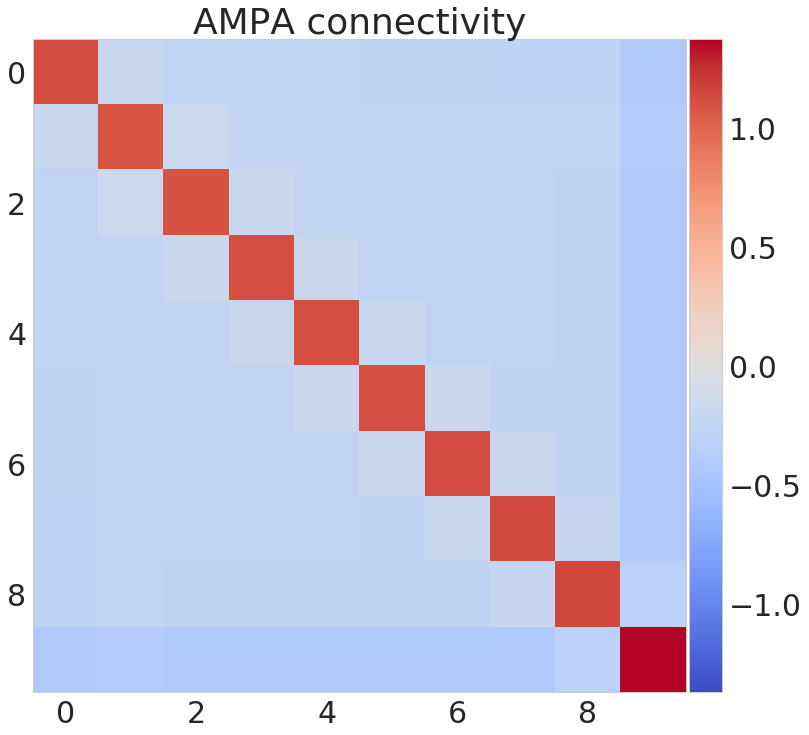

In [3]:
plot_weight_matrix(nn, ampa=True, one_hypercolum=False)

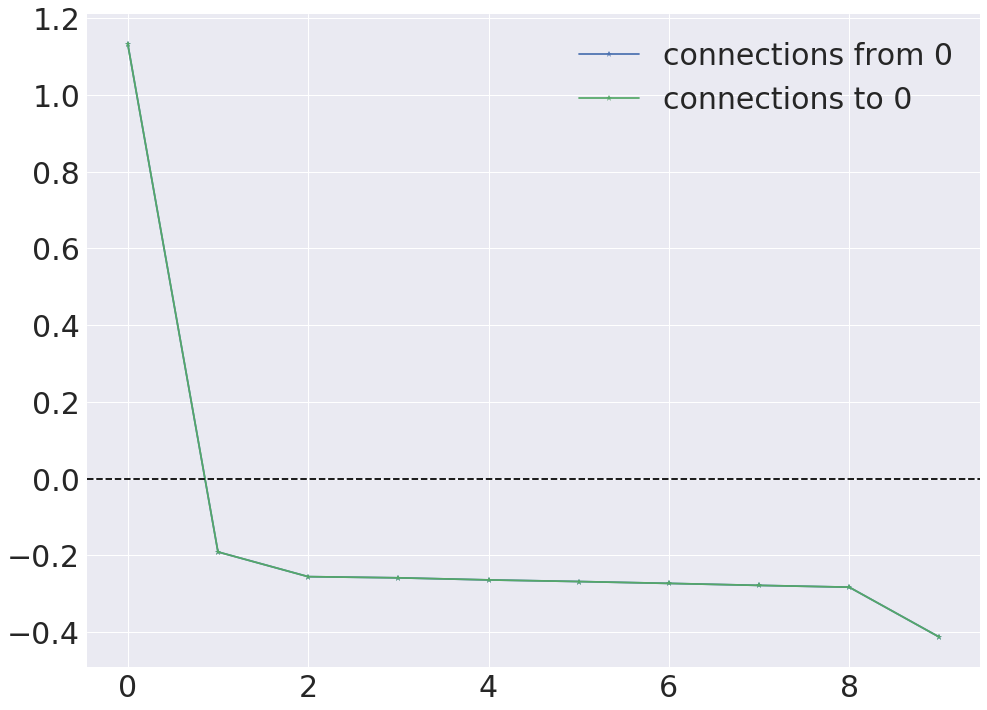

In [4]:
plt.plot(nn.w_ampa[:, 0], '*-', label='connections from 0')
plt.plot(nn.w_ampa[0, :], '*-', label='connections to 0')
plt.axhline(0, ls='--', color='black')

plt.legend();

#### Recall

success 0.0


/home/heberto/miniconda/envs/python3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/heberto/miniconda/envs/python3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/heberto/miniconda/envs/python3/lib/python3.5/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/heberto/miniconda/envs/python3/lib/python3.5/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/heberto/miniconda/envs/python3/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


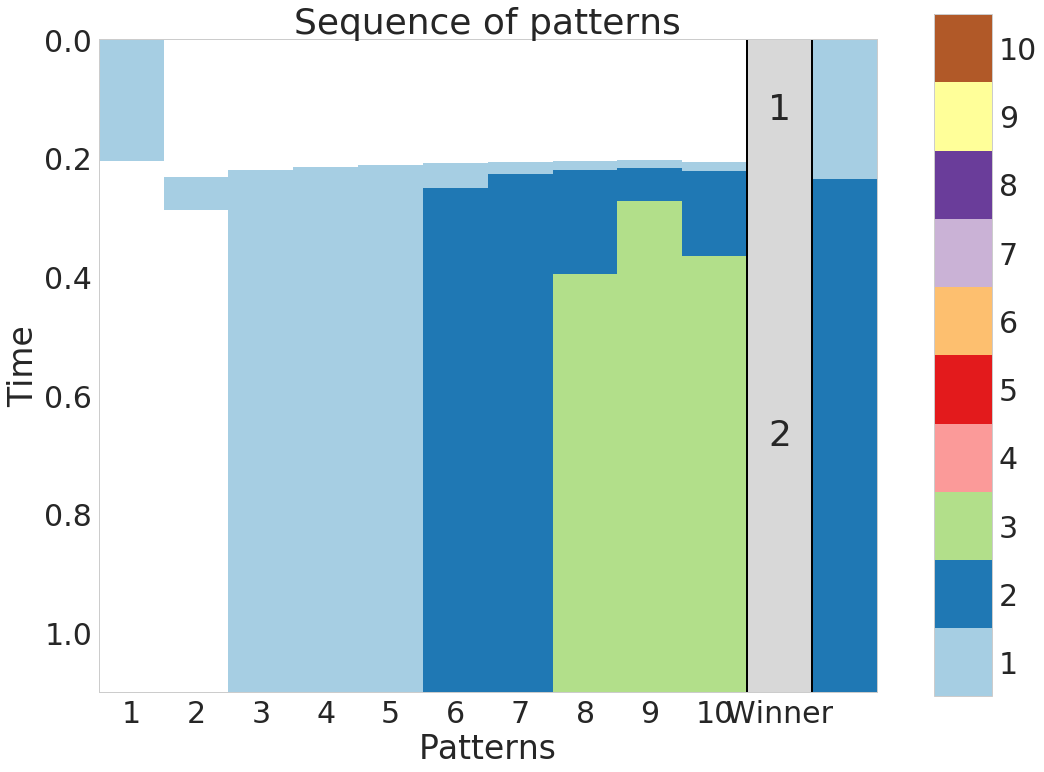

In [6]:
nn.sigma = 0.0
nn.g_w_ampa = 1.0
nn.g_w = 1.0
nn.tau_a = 0.200
nn.g_a = 1.0
nn.G = 1.0
nn.g_beta = 1.0

T_recall = 1.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_winning_pattern(manager)
print('success', success)

o = manager.history['o']
s = manager.history['s']
a = manager.history['a']
i_ampa = manager.history['i_ampa']
i_nmda = manager.history['i_nmda']
beta = manager.history['beta']

time = np.arange(0, manager.T_total, manager.dt)

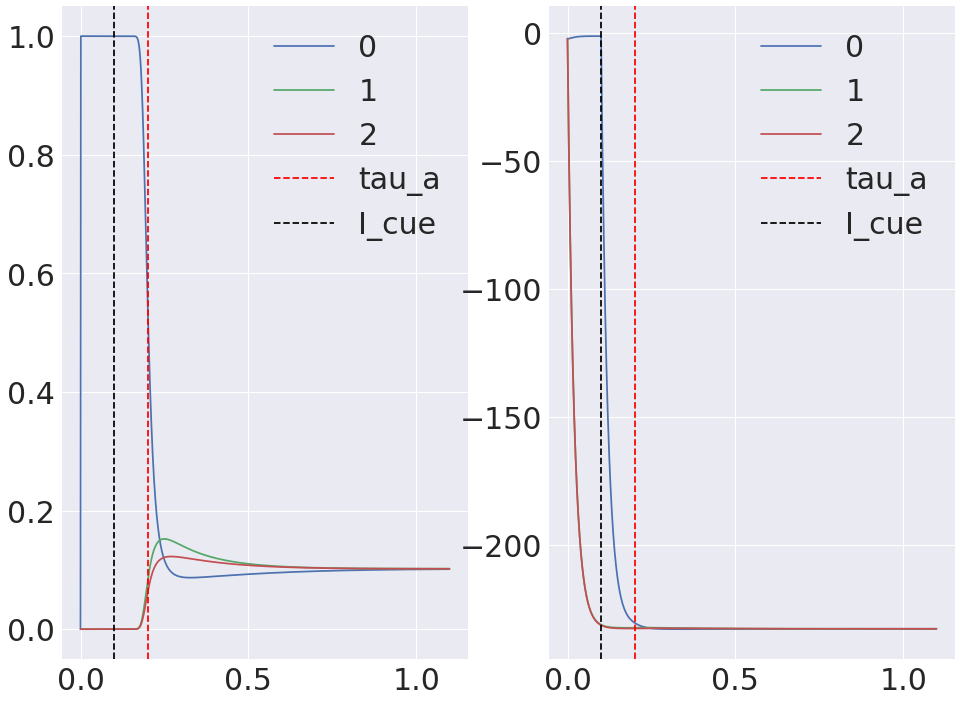

In [7]:
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, o[:, 0], label='0')
ax1.plot(time, o[:, 1], label='1')
ax1.plot(time, o[:, 2], label='2')
ax1.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax1.axvline(T_cue, ls='--', color='black', label='I_cue')

ax1.legend()

ax2.plot(time, s[:, 0], label='0')
ax2.plot(time, s[:, 1], label='1')
ax2.plot(time, s[:, 2], label='2')
ax2.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax2.axvline(T_cue, ls='--', color='black', label='I_cue')

ax2.legend();

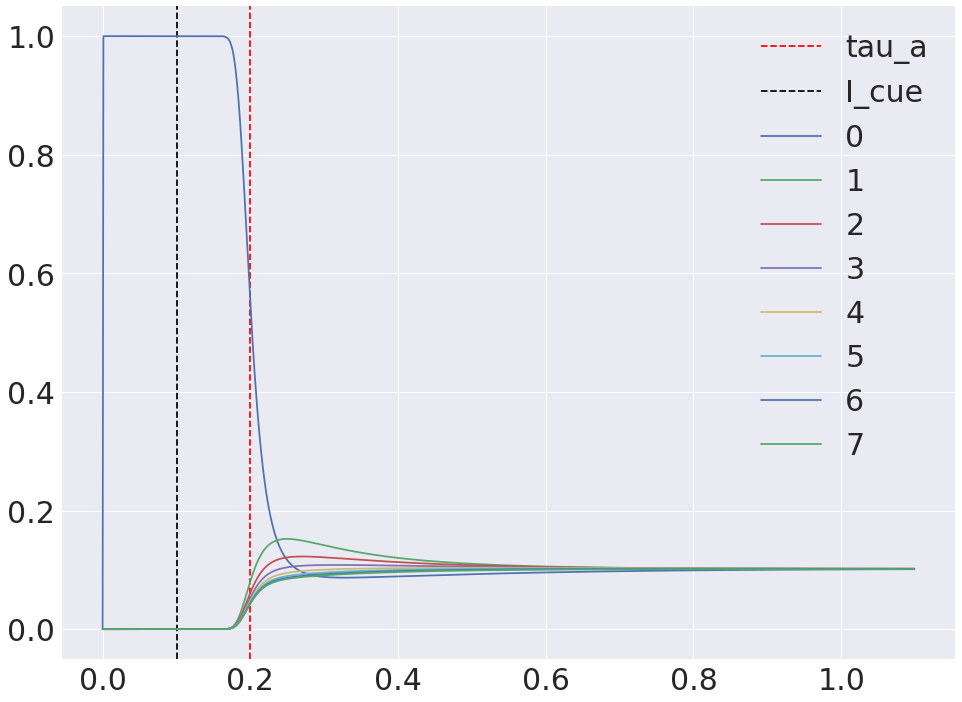

In [8]:
time = np.arange(0, manager.T_total, manager.dt)
time.shape
plt.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
plt.axvline(T_cue, ls='--', color='black', label='I_cue')

plt.plot(time, o[:, 0], label='0')
plt.plot(time, o[:, 1], label='1')
plt.plot(time, o[:, 2], label='2')
plt.plot(time, o[:, 3], label='3')
plt.plot(time, o[:, 4], label='4')
plt.plot(time, o[:, 5], label='5')
plt.plot(time, o[:, 6], label='6')
plt.plot(time, o[:, 7], label='7')

plt.legend();

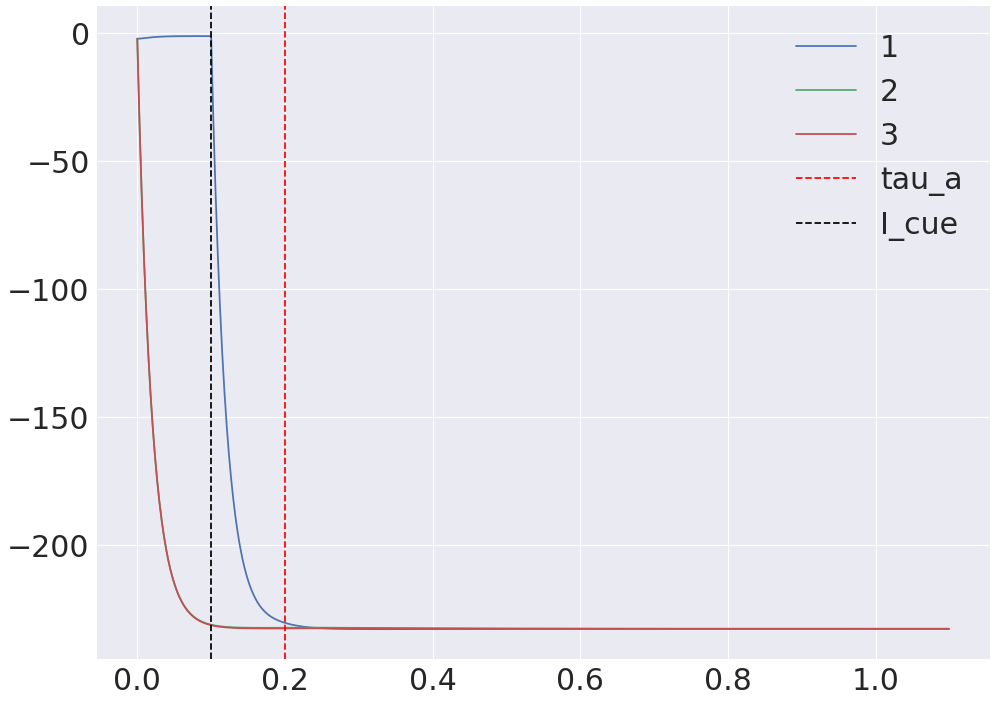

In [9]:
plt.plot(time, s[:, 0], label='1')
plt.plot(time, s[:, 1], label='2')
plt.plot(time, s[:, 2], label='3')

plt.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
plt.axvline(T_cue, ls='--', color='black', label='I_cue')

plt.legend();

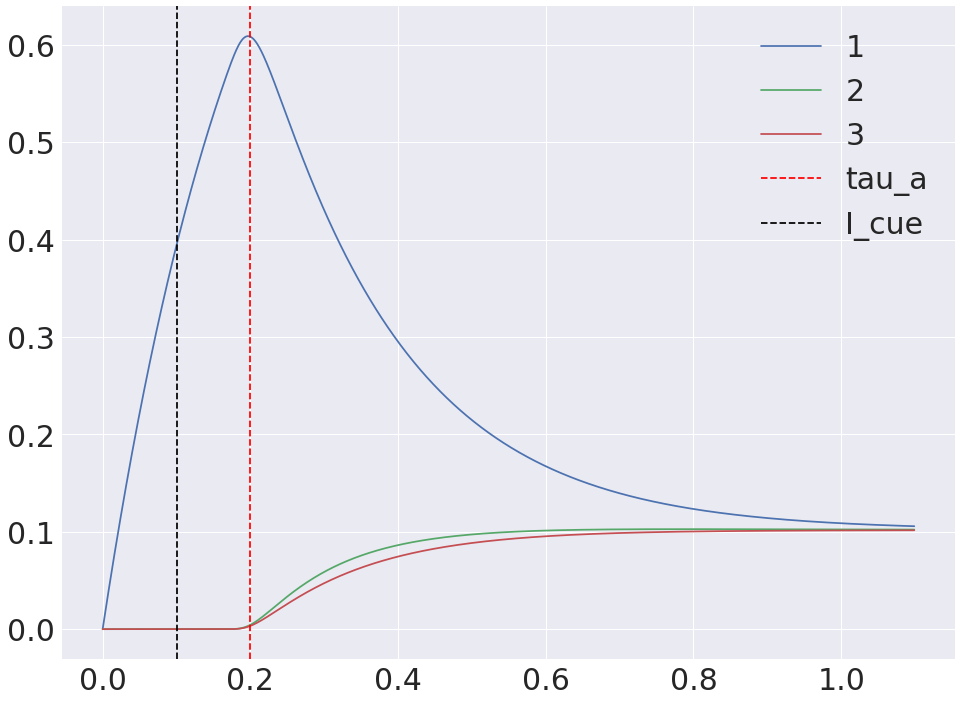

In [10]:
plt.plot(time, a[:, 0], label='1')
plt.plot(time, a[:, 1], label='2')
plt.plot(time, a[:, 2], label='3')

plt.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
plt.axvline(T_cue, ls='--', color='black', label='I_cue')

plt.legend();

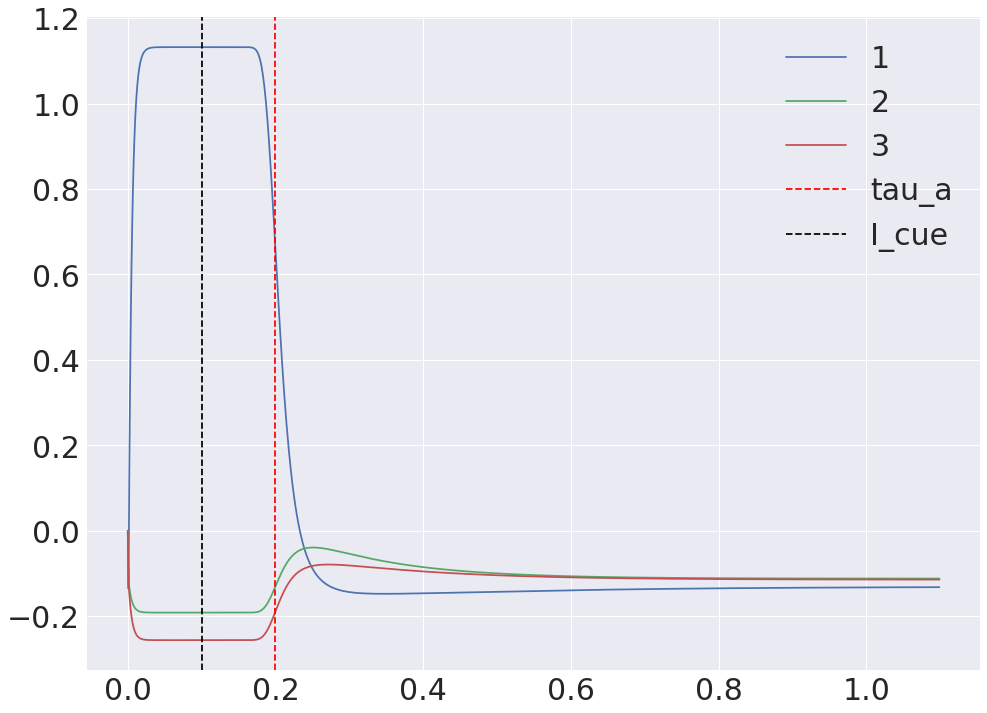

In [11]:
plt.plot(time, i_ampa[:, 0], label='1')
plt.plot(time, i_ampa[:, 1], label='2')
plt.plot(time, i_ampa[:, 2], label='3')

plt.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
plt.axvline(T_cue, ls='--', color='black', label='I_cue')

plt.legend();

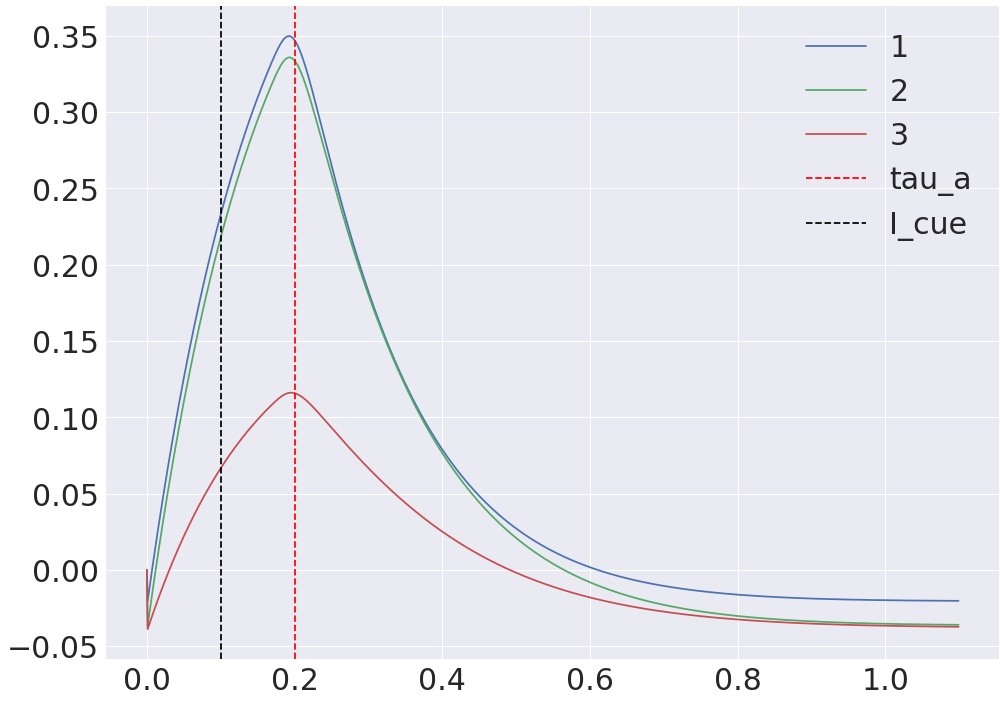

In [12]:
plt.plot(time, i_nmda[:, 0], label='1')
plt.plot(time, i_nmda[:, 1], label='2')
plt.plot(time, i_nmda[:, 2], label='3')

plt.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
plt.axvline(T_cue, ls='--', color='black', label='I_cue')

plt.legend();

In [13]:
patterns_recalled = [x[0] for x in timings]
times =[x[1] for x in timings]

In [14]:
patterns_indexes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [15]:
beta.shape

(1100, 10)

## Here we test different scenarios

epochs 0
epochs 1
epochs 2
success 0.0


{'G': 1.0,
 'epsilon': 1e-20,
 'g_I': 10.0,
 'g_a': 30.0,
 'g_beta': 1.0,
 'g_w': 0.0,
 'g_w_ampa': 3.0,
 'k': 0,
 'sigma': 0.0,
 'tau_a': 0.25,
 'tau_m': 0.02,
 'tau_p': 10.0,
 'tau_z_post': 0.005,
 'tau_z_post_ampa': 0.005,
 'tau_z_pre': 0.15,
 'tau_z_pre_ampa': 0.005}

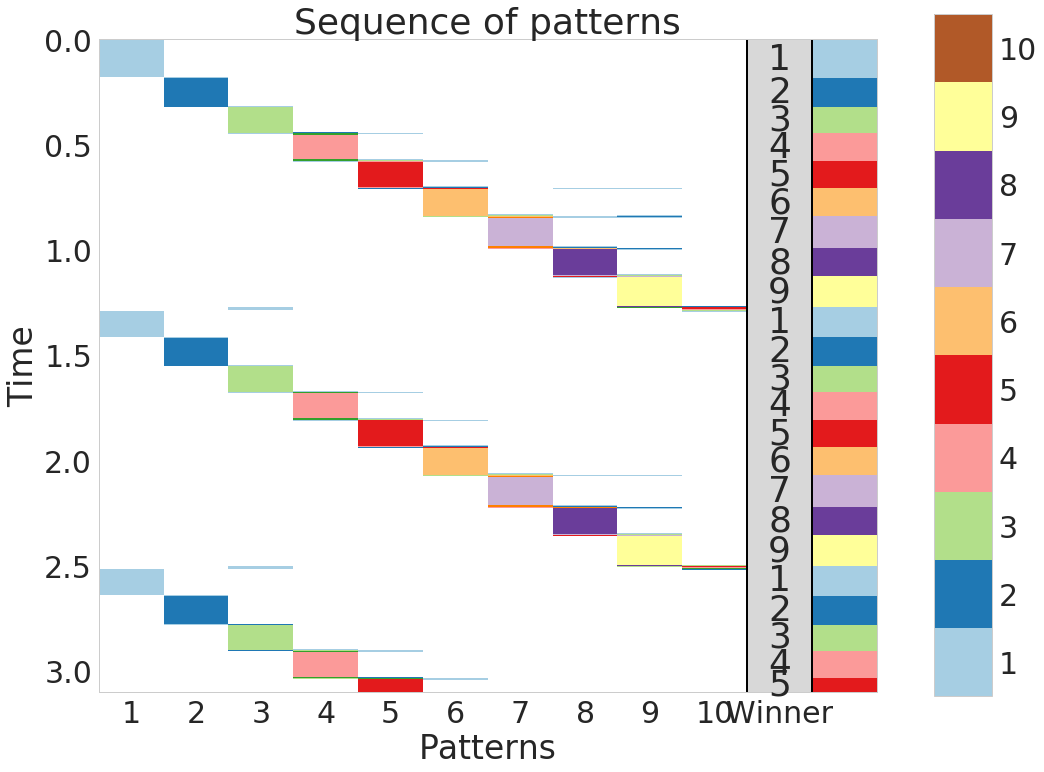

In [46]:
# Patterns parameters
hypercolumns = 4
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
values_to_save = ['o', 's', 'z_pre', 'z_post', 'a', 'p_pre', 'beta',
                  'p_post', 'p_co', 'z_co', 'w', 'i_ampa', 'i_nmda']
    
# Protocol
training_time = 0.100
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
tau_z_pre_ampa = 0.005
tau_z_post_ampa = 0.005
g_beta = 1.0
g_a = 30.0
tau_a = 0.250
diagonal_zero = True
g_w = 0.0
g_w_ampa = 3.0
sigma = 0.0
G = 1.0


nn = BCPNNModular(hypercolumns, minicolumns, tau_z_pre_ampa=tau_z_pre_ampa, 
                  tau_z_post_ampa=tau_z_post_ampa, diagonal_zero=diagonal_zero,
                  g_a=g_a, g_beta=g_beta, tau_a=tau_a, sigma=sigma, g_w=g_w, g_w_ampa=g_w_ampa,
                  G=G)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epoch_history = manager.run_network_protocol(protocol=protocol, verbose=True)

T_recall = 3.0
T_cue = 0.100
sequences = [patterns_indexes]
I_cue = 0.0
n = 1

aux = calculate_recall_time_quantities(manager, T_recall, T_cue, n, sequences)
total_sequence_time, mean, std, success, timings = aux
plot_winning_pattern(manager)
print('success', success)
nn.get_parameters()

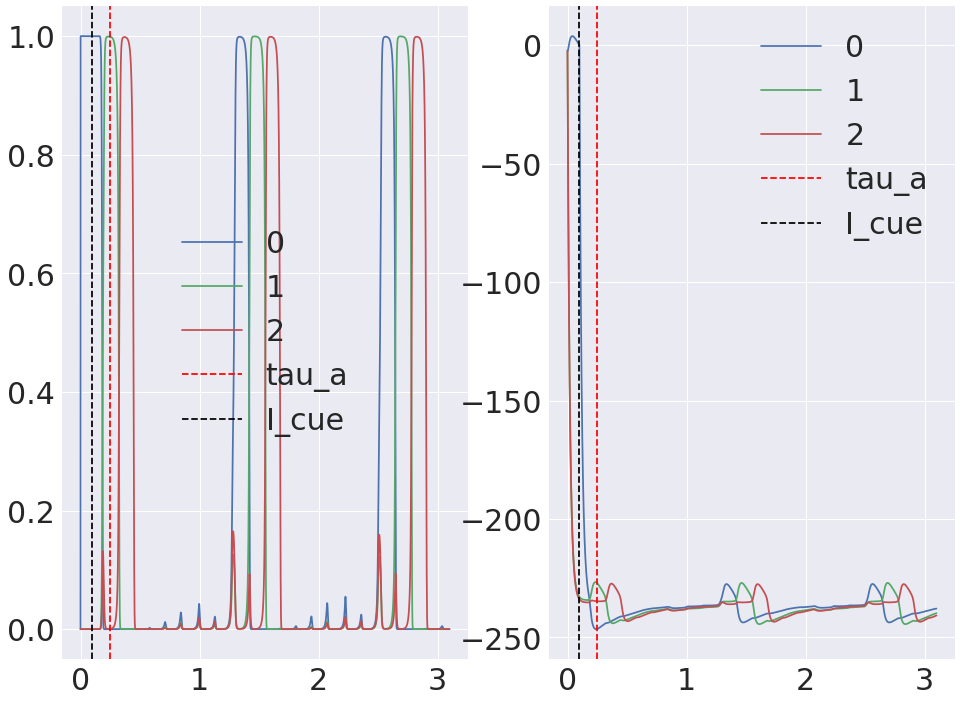

In [47]:
o = manager.history['o']
s = manager.history['s']
a = manager.history['a']
i_ampa = manager.history['i_ampa']
i_nmda = manager.history['i_nmda']
beta = manager.history['beta']

time = np.arange(0, manager.T_total, manager.dt)

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(time, o[:, 0], label='0')
ax1.plot(time, o[:, 1], label='1')
ax1.plot(time, o[:, 2], label='2')
ax1.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax1.axvline(T_cue, ls='--', color='black', label='I_cue')

ax1.legend()

ax2.plot(time, s[:, 0], label='0')
ax2.plot(time, s[:, 1], label='1')
ax2.plot(time, s[:, 2], label='2')
ax2.axvline(nn.tau_a, ls='--', color='red', label='tau_a')
ax2.axvline(T_cue, ls='--', color='black', label='I_cue')

ax2.legend();

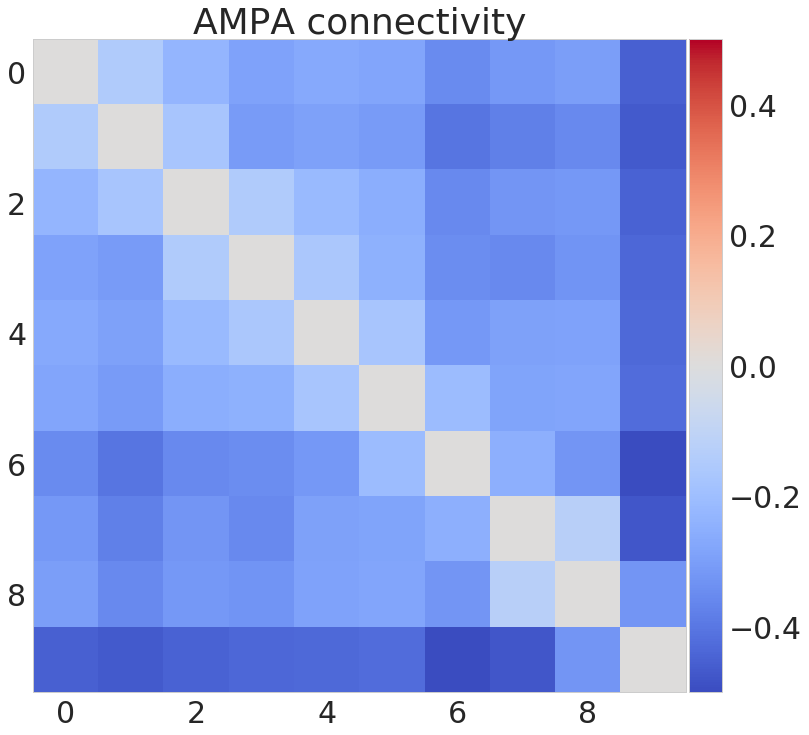

In [49]:
plot_weight_matrix(manager.nn, ampa=True)